In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np

In [213]:
df = pd.read_csv(os.path.join("D:\Code for tutorials\Machine Learning\datasets\gender classificaton dataset\gender_classification_v7.csv"))
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\DHUSNIC INFANT DM\AppData\Local\Temp\ipykernel_11856\23280648.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv(os.path.join("D:\Code for tutorials\Machine Learning\datasets\gender classificaton dataset\gender_classification_v7.csv"))


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [214]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [215]:
df['gender'].value_counts()

gender
Female    2501
Male      2500
Name: count, dtype: int64

In [216]:
df['gender']=df['gender'].map({'Male':1,'Female':0})
df['gender'].value_counts()


gender
0    2501
1    2500
Name: count, dtype: int64

In [217]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [218]:
X=df.drop('gender',axis=1)
y=df['gender']
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [219]:
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 0.38719442, -1.24793291,  0.28397148, ..., -1.01592361,
         1.01389375,  1.00220198],
       [-2.58268182,  0.73938869, -1.00941773, ..., -1.01592361,
         1.01389375, -0.99780285],
       [-2.58268182, -1.24793291,  0.65351125, ...,  0.98432598,
         1.01389375,  1.00220198],
       ...,
       [ 0.38719442, -0.25427211, -0.45510807, ..., -1.01592361,
        -0.98629664, -0.99780285],
       [ 0.38719442,  0.01672629,  0.46874136, ..., -1.01592361,
        -0.98629664, -0.99780285],
       [ 0.38719442,  2.00404789, -1.00941773, ...,  0.98432598,
         1.01389375,  1.00220198]], shape=(5001, 7))

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4000, 7)
X_test shape: (1001, 7)
y_train shape: (4000,)
y_test shape: (1001,)


In [221]:
model = LogisticRegression()
model.fit(X_train, y_train)
model

LogisticRegression()

In [222]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0], shape=(1001,))

In [223]:
accuracy_score = accuracy_score(y_test, y_pred)
print(accuracy_score)

0.961038961038961


In [224]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       502
           1       0.97      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



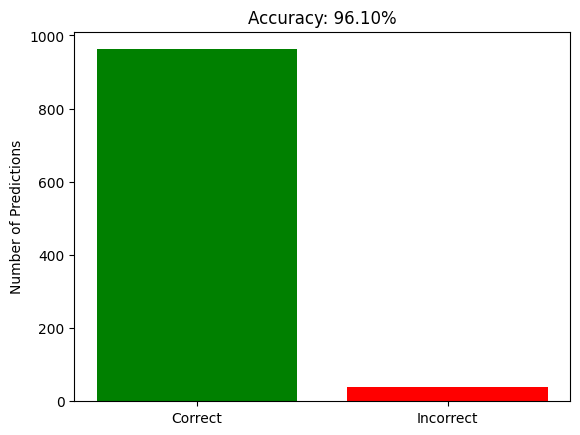

In [225]:
import matplotlib.pyplot as plt
import numpy as np

correct = sum(y_test == y_pred)
incorrect = len(y_test) - correct

plt.bar(['Correct', 'Incorrect'], [correct, incorrect], color=['green', 'red'])
plt.title(f'Accuracy: {correct / len(y_test):.2%}')
plt.ylabel('Number of Predictions')
plt.show()


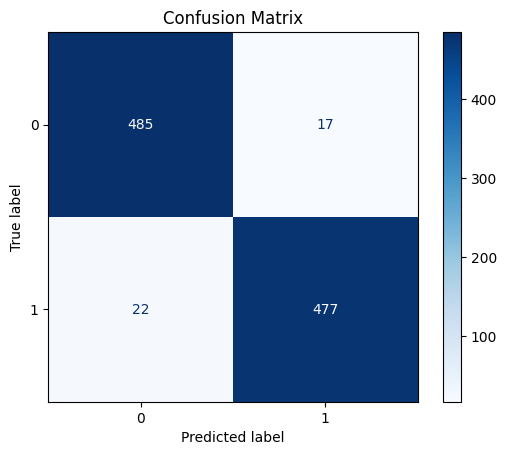

array([[485,  17],
       [ 22, 477]])

In [226]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
cm
